# Time Series Model 
* ref  
https://datascienceschool.net/view-notebook/8903aa20770746e78fb5b1834ab5334b/  
https://facebook.github.io/prophet/docs/non-daily_data.html#holidays-with-aggregated-data
- 방송일시별 취급액 예측
- 방송 시간대 넣은 취급액 예측

In [1]:
cd /content/drive/My Drive/빅콘

/content/drive/My Drive/빅콘


In [18]:
# ready
import os
import sys
import joblib
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd 
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.max_info_columns', 500)

import imp
import datetime
from tqdm import tqdm

In [3]:
# vusualize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# load data
data = joblib.load(os.path.join('data', 'Snd_FE.pkl'))
locals().update(data)

In [5]:
data['X']

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,경상지수,불변지수,현재생활형편CSI,현재경기판단CSI,생활형편전망CSI,소비지출전망CSI,주택가격전망CSI,임금수준전망CSI,소비자심리지수,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,Busan,Chungbuk,Chungnam,Daegu,Daejeon,Gangwon,Gwangju,Gyeongbuk,Gyeonggi,Gyeongnam,Incheon,Jeju,Jeonbuk,Jeonnam,Seoul,Total_x,Ulsan,Unclassified,Accommodation,Accommodation/Food Services,Airlines,Books/Stationery,Clothing/Miscellaneous Goods,Convenience Stores,Cosmetics,Department Stores,Discount Stores/Other Superstores,Domestic Motor Vehicles (New Products),Duty-free Shops,Education,Electronic Commerce,Fashion Accessories,Financial Services/Insurance,Food Products,Fuels,Furniture,Furniture/Electrical Appliances,Garments/Clothing Materials,General Food Products,General Hospitals,Health,Health Additive Foods,Household Appliances/Communication Equipment,Motor Vehicle Services,Motor Vehicles,Non-specialized Retail Stores,Other Goods and Services,Other Health Facilities,Other Vehicles,Public Transportation,Recreation/Culture,Restaurants/Other Food Services,Sports/Recreation/Leisure,Supermarkets,Total_y,Transport,Travel Agencies/Vehicle Rental,Utility Charges/Personal and Professional Services,Watches/Jewellery/Eyeglasses,강수량(mm)_경기_동두천,강수량(mm)_경기_수원,강수량(mm)_경기_양평,강수량(mm)_경기_이천,강수량(mm)_경기_파주,강수량(mm)_광주,강수량(mm)_대구,강수량(mm)_대전,강수량(mm)_부산,강수량(mm)_서울,강수량(mm)_울산,강수량(mm)_인천_강화,강수량(mm)_인천_인천,기온(°C)_경기_동두천,기온(°C)_경기_수원,기온(°C)_경기_양평,기온(°C)_경기_이천,기온(°C)_경기_파주,기온(°C)_광주,기온(°C)_대구,기온(°C)_대전,기온(°C)_부산,기온(°C)_서울,기온(°C)_울산,기온(°C)_인천_강화,기온(°C)_인천_인천,습도(%)_경기_동두천,습도(%)_경기_수원,습도(%)_경기_양평,습도(%)_경기_이천,습도(%)_경기_파주,습도(%)_광주,습도(%)_대구,습도(%)_대전,습도(%)_부산,습도(%)_서울,습도(%)_울산,습도(%)_인천_강화,습도(%)_인천_인천,시정(10m)_경기_동두천,시정(10m)_경기_수원,시정(10m)_경기_양평,시정(10m)_경기_이천,시정(10m)_경기_파주,시정(10m)_광주,시정(10m)_대구,시정(10m)_대전,시정(10m)_부산,시정(10m)_서울,시정(10m)_울산,시정(10m)_인천_강화,시정(10m)_인천_인천,이슬점온도(°C)_경기_동두천,이슬점온도(°C)_경기_수원,이슬점온도(°C)_경기_양평,이슬점온도(°C)_경기_이천,이슬점온도(°C)_경기_파주,이슬점온도(°C)_광주,이슬점온도(°C)_대구,이슬점온도(°C)_대전,이슬점온도(°C)_부산,이슬점온도(°C)_서울,이슬점온도(°C)_울산,이슬점온도(°C)_인천_강화,이슬점온도(°C)_인천_인천,일조 QC플래그_경기_동두천,일조 QC플래그_경기_수원,일조 QC플래그_경기_양평,일조 QC플래그_경기_이천,일조 QC플래그_경기_파주,일조 QC플래그_광주,일조 QC플래그_대구,일조 QC플래그_대전,일조 QC플래그_부산,일조 QC플래그_서울,일조 QC플래그_울산,일조 QC플래그_인천_강화,일조 QC플래그_인천_인천,일조(hr)_경기_동두천,일조(hr)_경기_수원,일조(hr)_경기_양평,일조(hr)_경기_이천,일조(hr)_경기_파주,일조(hr)_광주,일조(hr)_대구,일조(hr)_대전,일조(hr)_부산,일조(hr)_서울,일조(hr)_울산,일조(hr)_인천_강화,일조(hr)_인천_인천,전운량(10분위)_경기_동두천,전운량(10분위)_경기_수원,전운량(10분위)_경기_양평,전운량(10분위)_경기_이천,전운량(10분위)_경기_파주,전운량(10분위)_광주,전운량(10분위)_대구,전운량(10분위)_대전,전운량(10분위)_부산,전운량(10분위)_서울,전운량(10분위)_울산,전운량(10분위)_인천_강화,전운량(10분위)_인천_인천,중하층운량(10분위)_경기_동두천,중하층운량(10분위)_경기_수원,중하층운량(10분위)_경기_양평,중하층운량(10분위)_경기_이천,중하층운량(10분위)_경기_파주,중하층운량(10분위)_광주,중하층운량(10분위)_대구,중하층운량(10분위)_대전,중하층운량(10분위)_부산,중하층운량(10분위)_서울,중하층운량(10분위)_울산,중하층운량(10분위)_인천_강화,중하층운량(10분위)_인천_인천,증기압(hPa)_경기_동두천,증기압(hPa)_경기_수원,증기압(hPa)_경기_양평,증기압(hPa)_경기_이천,증기압(hPa)_경기_파주,증기압(hPa)_광주,증기압(hPa)_대구,증기압(hPa)_대전,증기압(hPa)_부산,증기압(hPa)_서울,증기압(hPa)_울산,증기압(hPa)_인천_강화,증기압(hPa)_인천_인천,지면온도(°C)_경기_동두천,지면온도(°C)_경기_수원,지면온도(°C)_경기_양평,지면온도(°C)_경기_이천,지면온도(°C)_경기_파주,지면온도(°C)_광주,지면온도(°C)_대구,지면온도(°C)_대전,지면온도(°C)_부산,지면온도(°C)_서울,지면온도(°C)_울산,지면온도(°C)_인천_강화,지면온도(°C)_인천_인천,최저운고(100m )_경기_동두천,최저운고(100m )_경기_수원,최저운고(100m )_경기_양평,최저운고(100m )_경기_이천,최저운고(100m )_경기_파주,최저운고(100m )_광주,최저운고(100m )_대구,최저운고(100m )_대전,최저운고(100m )_부산,최저운고(100m )_서울,최저운고(100m )_울산,최저운고(100m )_인천_강화,최저운고(100m )_인천_인천,풍속(m/s)_경기_동두천,풍속(m/s)_경기_수원,풍속(m/s)_경기_양평,풍속(m/s)_경기_이천,풍속(m/s)_경기_파주,풍속(m/s)_광주,풍속(m/s)_대구,풍속

In [6]:
data['y']

0          2099000.0
1          4371000.0
2          3262000.0
3          6955000.0
4          6672000.0
            ...     
38299      2328000.0
38300     50929000.0
38301     13765000.0
38302    104392000.0
38303     46608000.0
Name: 취급액, Length: 35379, dtype: float64

In [8]:
# load data
sale = pd.read_excel('data/sale_data_v05_0828.xlsx')
sale.head(1)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,옵션,종류,브랜드,상품명다시,단위
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865.0,테이트 남성 셀린니트 3종,0.0,NaN,0,테이트,남성 셀린니트,3종


## Time Series Data

In [11]:
ts = sale[['방송일시','취급액']]
ts.head(2)

,방송일시,취급액
0,2019-01-01 06:00:00,2099000.0
1,2019-01-01 06:00:00,4371000.0


In [12]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 598.7 KB


In [14]:
ts['방송일시'] = pd.to_datetime(ts['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
ts['방송일시_date']       = ts['방송일시'].dt.date         # YYYY-MM-DD(문자)
ts['방송일시_year']       = ts['방송일시'].dt.year         # 연(4자리숫자)
ts['방송일시_month']      = ts['방송일시'].dt.month        # 월(숫자)
ts['방송일시_month_name'] = ts['방송일시'].dt.month_name() # 월(문자)

ts['방송일시_day']        = ts['방송일시'].dt.day          # 일(숫자)
ts['방송일시_time']       = ts['방송일시'].dt.time         # HH:MM:SS(문자)
ts['방송일시_hour']       = ts['방송일시'].dt.hour         # 시(숫자)
ts['방송일시_minute']     = ts['방송일시'].dt.minute       # 분(숫자)
ts['방송일시_second']     = ts['방송일시'].dt.second       # 초(숫자)

In [20]:
ts.head(2)

,방송일시,취급액,방송일시_date,방송일시_year,방송일시_month,방송일시_month_name,방송일시_day,방송일시_time,방송일시_hour,방송일시_minute,방송일시_second
0,2019-01-01 06:00:00,2099000.0,2019-01-01,2019,1,January,1,06:00:00,6,0,0
1,2019-01-01 06:00:00,4371000.0,2019-01-01,2019,1,January,1,06:00:00,6,0,0


In [32]:
# data 날짜 일시 데이터만 사용
df = ts.groupby('방송일시_date').agg({
    '취급액' : [('방송일시별 취급액', np.sum)]
}).reset_index()
df

,방송일시_date,취급액
,,방송일시별 취급액
0,2019-01-01,2.712779e+09
1,2019-01-02,2.011023e+09
2,2019-01-03,2.062043e+09
3,2019-01-04,2.049394e+09
4,2019-01-05,2.588390e+09
5,2019-01-06,2.575604e+09
6,2019-01-07,2.047011e+09
7,2019-01-08,2.130814e+09
8,2019-01-09,2.032388e+09


In [34]:
df['방송일시_date'] = pd.to_datetime(df['방송일시_date'], format='%Y-%m-%d', errors='raise')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (방송일시_date, )     366 non-null    datetime64[ns]
 1   (취급액, 방송일시별 취급액)  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [37]:
df.columns = ['ds','y']

* model

In [22]:
# model
from fbprophet import Prophet

m = Prophet()

In [39]:
m.fit(df)    # 데이터프레임 컬럼 명이 ㅇㄴ

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
# predict
future = m.make_future_dataframe(periods=181)
future.tail()       # 2020-06-30 까지

,ds
542,2020-06-26
543,2020-06-27
544,2020-06-28
545,2020-06-29
546,2020-06-30


In [46]:
forecast = m.predict(future)
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
517,2020-06-01,2.719014e+09,2.230124e+09,2.952765e+09,2.682672e+09,2.753938e+09,-1.087616e+08,-1.087616e+08,-1.087616e+08,-1.087616e+08,-1.087616e+08,-1.087616e+08,0.0,0.0,0.0,2.610252e+09
518,2020-06-02,2.720713e+09,2.274969e+09,2.976230e+09,2.684191e+09,2.755936e+09,-8.802949e+07,-8.802949e+07,-8.802949e+07,-8.802949e+07,-8.802949e+07,-8.802949e+07,0.0,0.0,0.0,2.632684e+09
519,2020-06-03,2.722413e+09,2.283066e+09,2.954687e+09,2.685592e+09,2.758188e+09,-9.831347e+07,-9.831347e+07,-9.831347e+07,-9.831347e+07,-9.831347e+07,-9.831347e+07,0.0,0.0,0.0,2.624100e+09
520,2020-06-04,2.724113e+09,2.296068e+09,3.032517e+09,2.686898e+09,2.760317e+09,-8.273451e+07,-8.273451e+07,-8.273451e+07,-8.273451e+07,-8.273451e+07,-8.273451e+07,0.0,0.0,0.0,2.641378e+09
521,2020-06-05,2.725812e+09,2.217896e+09,2.943692e+09,2.688420e+09,2.762430e+09,-1.479687e+08,-1.479687e+08,-1.479687e+08,-1.479687e+08,-1.479687e+08,-1.479687e+08,0.0,0.0,0.0,2.577844e+09
522,2020-06-06,2.727512e+09,2.533384e+09,3.228434e+09,2.689949e+09,2.764521e+09,1.683020e+08,1.683020e+08,1.683020e+08,1.683020e+08,1.683020e+08,1.683020e+08,0.0,0.0,0.0,2.895814e+09
523,2020-06-07,2.729211e+09,2.709717e+09,3.406806e+09,2.691478e+09,2.766641e+09,3.575057e+08,3.575057e+08,3.575057e+08,3.575057e+08,3.575057e+08,3.575057e+08,0.0,0.0,0.0,3.086717e+09
524,2020-06-08,2.730911e+09,2.237314e+09,2.983181e+09,2.693007e+09,2.768630e+09,-1.087616e+08,-1.087616e+08,-1.087616e+08,-1.087616e+08,-1.087616e+08,-1.087616e+08,0.0,0.0,0.0,2.622150e+09
525,2020-06-09,2.732611e+09,2.267654e+09,3.005425e+09,2.694290e+09,2.770457e+09,-8.802949e+07,-8.802949e+07,-8.802949e+07,-8.802949e+07,-8.802949e+07,-8.802949e+07,0.0,0.0,0.0,2.644581e+09
526,2020-06-10,2.734310e+09,2.295580e+09,2.983551e+09,2.695537e+09,2.772294e+09,-9.831347e+07,-9.831347e+07,-9.831347e+07,-9.831347e+07,-9.831347e+07,-9.831347e+07,0.0,0.0,0.0,2.635997e+09


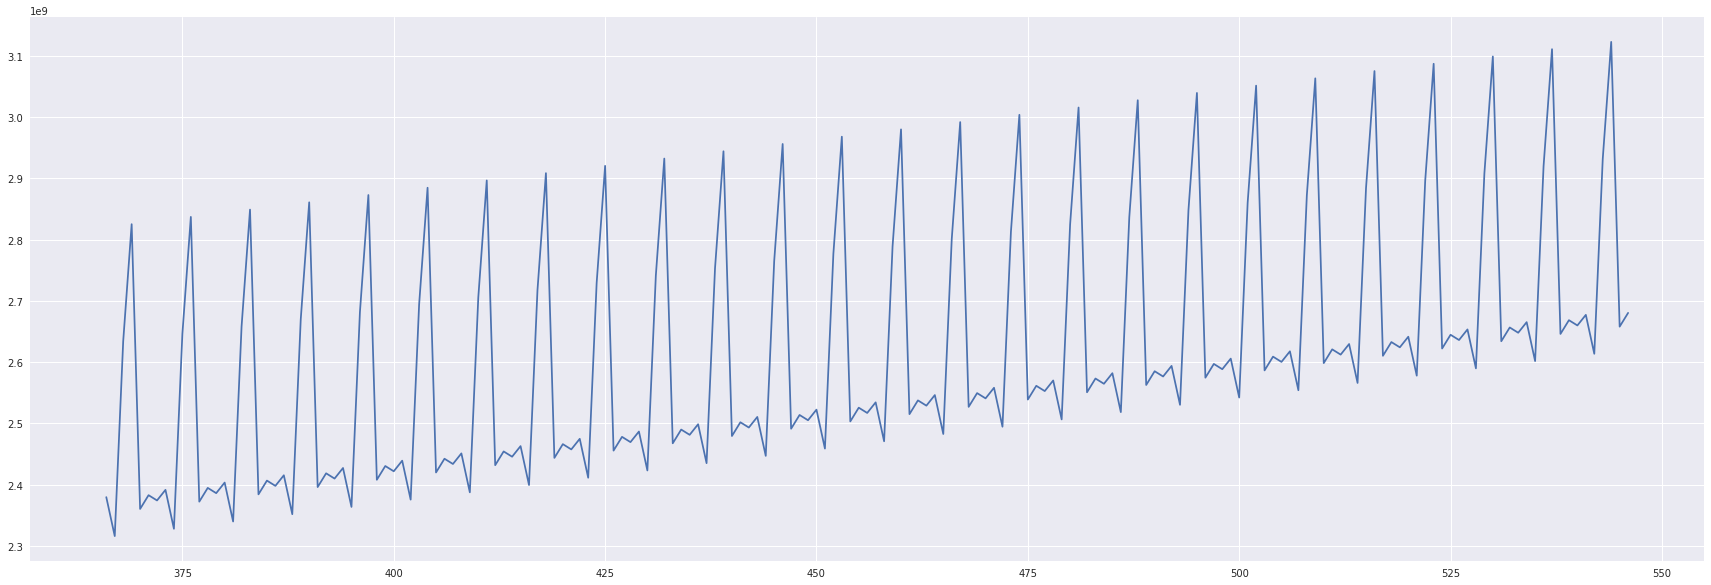

In [55]:
plt.figure(figsize=(30,10))
forecast.iloc[-181:, :].yhat.plot()

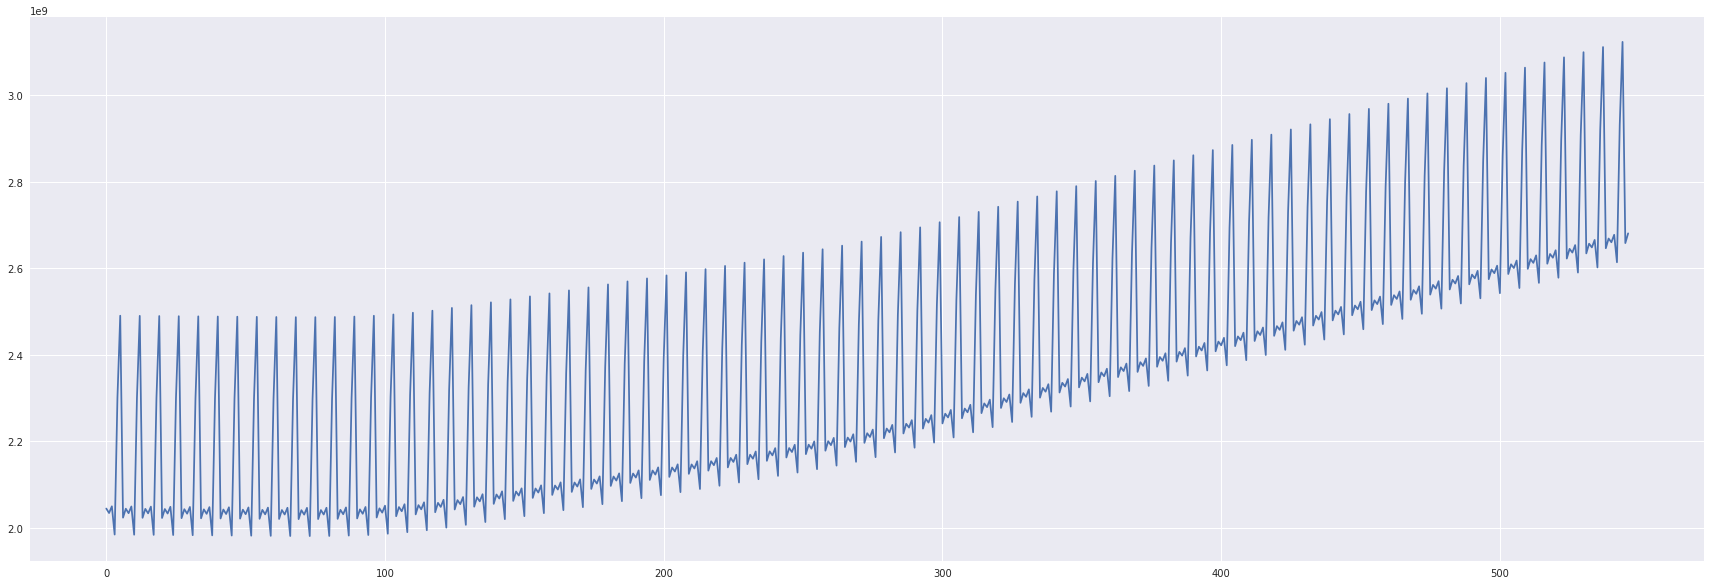

In [58]:
plt.figure(figsize=(30,10))
forecast.iloc[:, :].yhat.plot()

<Figure size 2160x720 with 0 Axes>

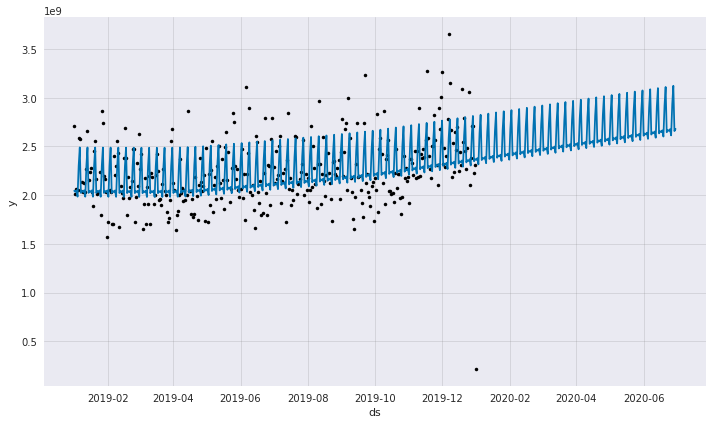

In [60]:
plt.figure(figsize=(30,10))
fig1 = m.plot(forecast, uncertainty=False)

<Figure size 2160x720 with 0 Axes>

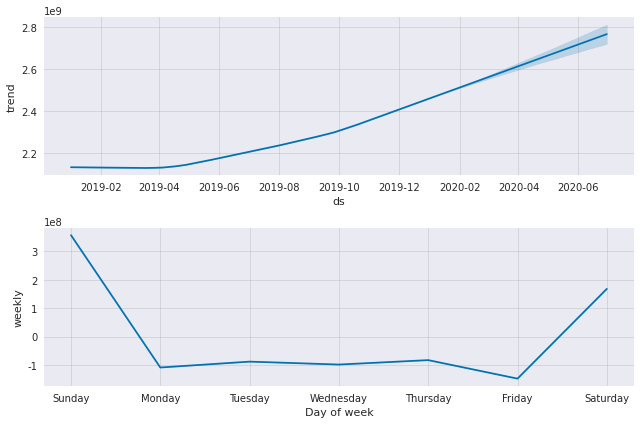

In [63]:
plt.figure(figsize=(30,10))
fig2 = m.plot_components(forecast)
plt.show()

* 신뢰구간

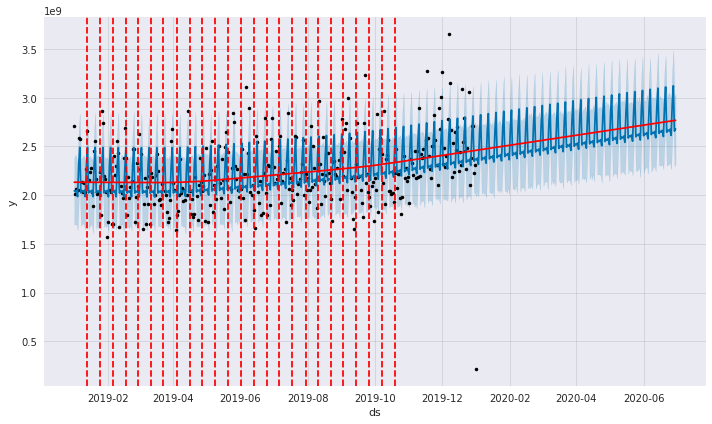

In [62]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0)
plt.show()

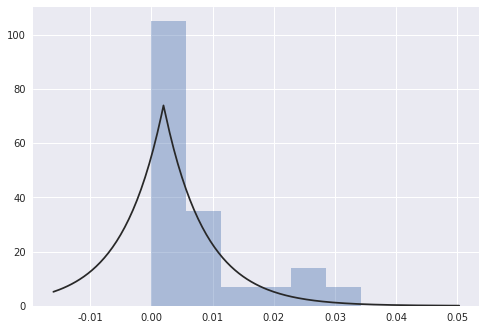

In [54]:
import scipy as sp
sns.distplot(m.params["delta"], kde=False, fit=sp.stats.laplace)
plt.show()
